In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil, sys 
import keras as ks
from scipy.misc import *
from keras.layers import Dense, Input
from keras.optimizers import SGD,Adam
from keras.models import Model,Sequential
from shutil import copyfile, move
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,GlobalAveragePooling2D
from keras.layers import LeakyReLU,MaxPooling2D,Dropout
from keras.layers import BatchNormalization,Flatten
from keras.callbacks import TensorBoard as tensorbord1
from PIL import Image, ImageFile

In [61]:
from keras.applications.resnet50 import ResNet50

In [62]:
import os, sys
from PIL import Image

In [63]:
train_csv = pd.read_csv("train.csv")
train_csv["Class"].unique()
train_csv.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [50]:
for index, row in train_csv.iterrows():
    shutil.copy2("Train/"+row["ID"],row["Class"]+"/"+row["ID"])

(array([0, 1, 2]),
 [Text(0, 0, 'MIDDLE'), Text(1, 0, 'YOUNG'), Text(2, 0, 'OLD')])

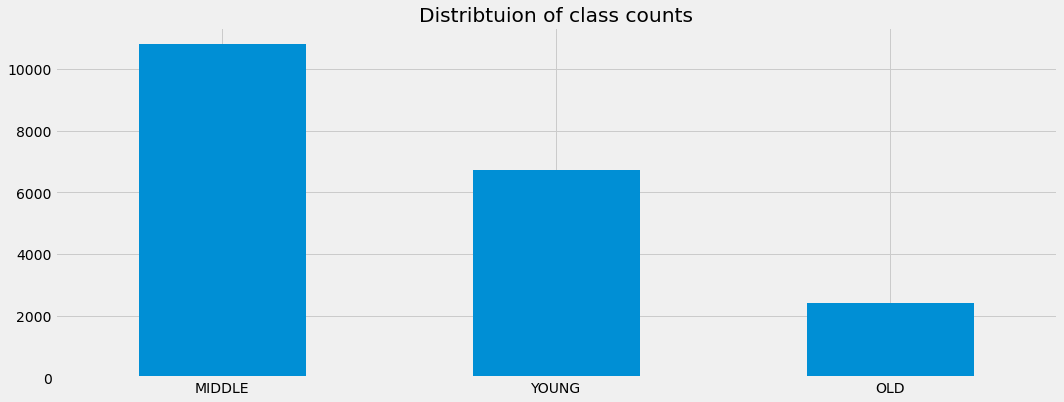

In [51]:
plt.figure(figsize = (16,6))
plt.style.use("fivethirtyeight")
train_csv['Class'].value_counts(dropna = False).plot(kind = 'bar',grid = True)
plt.title("Distribtuion of class counts")
plt.xticks(rotation = 0)

In [83]:
batch_size=52

# To handle image loading problem
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training',
                                   target_size = (64, 64),
                                   batch_size = batch_size,
                                   class_mode = 'categorical')

validation_set = test_datagen.flow_from_directory('dataset/validation_set',
                                  target_size = (64, 64),
                                  batch_size = batch_size,
                                  class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/Test',
                                  target_size = (64, 64),
                                  batch_size = batch_size,
                                  class_mode = 'categorical')

print(training_set.class_indices)
print(training_set)

Found 19906 images belonging to 3 classes.
Found 4158 images belonging to 3 classes.
Found 6636 images belonging to 1 classes.
{'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}


In [73]:
model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape = (64, 64, 3),padding='same'))
model.add(Conv2D(32, (3, 3),activation='relu', input_shape = (64, 64, 3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
model.add(Dropout(0.4))

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.3))

#Flatten
model.add(Flatten())#search
model.add(Dense(128,activation='relu'))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)       

In [74]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#fitting model
history = model.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 30,
                         validation_data = validation_set,
                         validation_steps = len(validation_set),
#                          callbacks=[tensorbord1],
                         verbose=2)

Epoch 1/30
 - 1138s - loss: 1.0042 - accuracy: 0.5491 - val_loss: 0.6534 - val_accuracy: 0.8595
Epoch 2/30
 - 582s - loss: 0.8259 - accuracy: 0.6265 - val_loss: 0.4930 - val_accuracy: 0.7287
Epoch 3/30
 - 817s - loss: 0.7728 - accuracy: 0.6575 - val_loss: 0.4448 - val_accuracy: 0.7845
Epoch 4/30
 - 492s - loss: 0.7486 - accuracy: 0.6735 - val_loss: 0.6266 - val_accuracy: 0.7860
Epoch 5/30
 - 488s - loss: 0.7242 - accuracy: 0.6850 - val_loss: 0.5977 - val_accuracy: 0.7785
Epoch 6/30
 - 483s - loss: 0.7065 - accuracy: 0.6981 - val_loss: 0.7555 - val_accuracy: 0.7470
Epoch 7/30
 - 477s - loss: 0.6884 - accuracy: 0.7053 - val_loss: 0.7118 - val_accuracy: 0.7097
Epoch 8/30
 - 479s - loss: 0.6707 - accuracy: 0.7131 - val_loss: 0.6141 - val_accuracy: 0.7116
Epoch 9/30
 - 499s - loss: 0.6597 - accuracy: 0.7193 - val_loss: 0.5586 - val_accuracy: 0.7612
Epoch 10/30
 - 472s - loss: 0.6507 - accuracy: 0.7220 - val_loss: 0.4831 - val_accuracy: 0.7576
Epoch 11/30
 - 470s - loss: 0.6421 - accuracy: 0

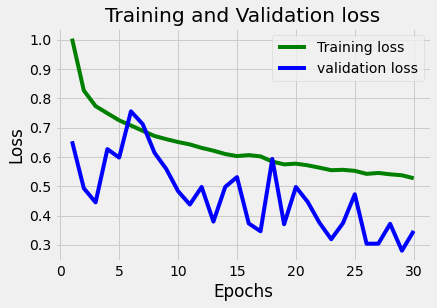

In [75]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

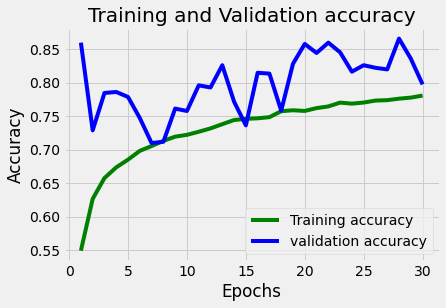

In [76]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('trained_model.h5')

In [77]:
model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape = (64, 64, 3),padding='same'))
model.add(Conv2D(32, (3, 3),activation='relu', input_shape = (64, 64, 3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# Dropout
model.add(Dropout(0.4))

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))#search
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))#search
model.add(BatchNormalization())#search

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))#search
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))#search
model.add(BatchNormalization())#search

#Max Pooling
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))#search
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))#search
model.add(BatchNormalization())#search

# Dropout
model.add(Dropout(0.3))

#Flatten
model.add(Flatten())#search
model.add(Dense(128,activation='relu'))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 30, 30, 32)       

In [78]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#fitting model
history = model.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 50,
                         validation_data = validation_set,
                         validation_steps = len(validation_set),
#                          callbacks=[tensorbord1],
                         verbose=2)

Epoch 1/50
 - 667s - loss: 0.9611 - accuracy: 0.5595 - val_loss: 0.5073 - val_accuracy: 0.8389
Epoch 2/50
 - 466s - loss: 0.8179 - accuracy: 0.6329 - val_loss: 0.7604 - val_accuracy: 0.7684
Epoch 3/50
 - 1535s - loss: 0.7830 - accuracy: 0.6558 - val_loss: 0.5681 - val_accuracy: 0.8076
Epoch 4/50
 - 1075s - loss: 0.7538 - accuracy: 0.6720 - val_loss: 0.4422 - val_accuracy: 0.7739
Epoch 5/50
 - 1249s - loss: 0.7230 - accuracy: 0.6865 - val_loss: 0.7051 - val_accuracy: 0.7694
Epoch 6/50
 - 615s - loss: 0.6987 - accuracy: 0.7000 - val_loss: 0.4288 - val_accuracy: 0.8069
Epoch 7/50
 - 492s - loss: 0.6771 - accuracy: 0.7129 - val_loss: 0.5578 - val_accuracy: 0.7636
Epoch 8/50
 - 545s - loss: 0.6677 - accuracy: 0.7176 - val_loss: 0.4042 - val_accuracy: 0.8341
Epoch 9/50
 - 488s - loss: 0.6505 - accuracy: 0.7237 - val_loss: 0.4955 - val_accuracy: 0.7975
Epoch 10/50
 - 513s - loss: 0.6470 - accuracy: 0.7288 - val_loss: 0.4593 - val_accuracy: 0.7833
Epoch 11/50
 - 490s - loss: 0.6288 - accuracy:

C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 1243s - loss: 0.5593 - accuracy: 0.7685 - val_loss: 0.3022 - val_accuracy: 0.8547
Epoch 23/50
 - 631s - loss: 0.5486 - accuracy: 0.7714 - val_loss: 0.4394 - val_accuracy: 0.8362
Epoch 24/50
 - 531s - loss: 0.5388 - accuracy: 0.7750 - val_loss: 0.3393 - val_accuracy: 0.8442
Epoch 25/50
 - 579s - loss: 0.5444 - accuracy: 0.7742 - val_loss: 0.5941 - val_accuracy: 0.8013
Epoch 26/50
 - 580s - loss: 0.5421 - accuracy: 0.7754 - val_loss: 0.3412 - val_accuracy: 0.8098
Epoch 27/50
 - 489s - loss: 0.5320 - accuracy: 0.7782 - val_loss: 0.6080 - val_accuracy: 0.7730
Epoch 28/50
 - 488s - loss: 0.5362 - accuracy: 0.7809 - val_loss: 0.4004 - val_accuracy: 0.8377
Epoch 29/50
 - 518s - loss: 0.5258 - accuracy: 0.7815 - val_loss: 0.4223 - val_accuracy: 0.8271
Epoch 30/50
 - 538s - loss: 0.5274 - accuracy: 0.7855 - val_loss: 0.2843 - val_accuracy: 0.8766
Epoch 31/50
 - 509s - loss: 0.5178 - accuracy: 0.7882 - val_loss: 0.3427 - val_accuracy: 0.8324
Epoch 32/50
 - 477s - loss: 0.5191 - accuracy: 0.78

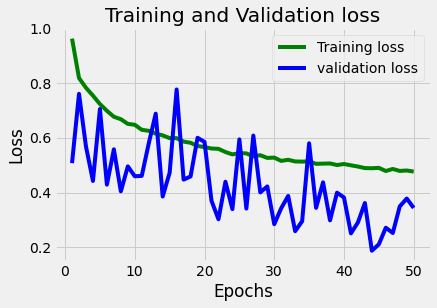

In [80]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

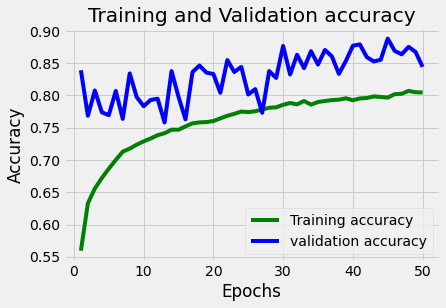

In [81]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
# loading resnet model
Rsnt_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1888s 20us/step


In [64]:
av1 = GlobalAveragePooling2D()(Rsnt_model.output)
fc1 = Dense(256, activation='relu')(av1)
drp1=Dropout(0.35)(fc1)
fc2 = Dense(128, activation='relu')(drp1)
drp2=Dropout(0.4)(fc2)
bat_norm=BatchNormalization()(drp2)
fc3 = Dense(68, activation='relu')(bat_norm)
drp3=Dropout(0.25)(fc3)
fc4 = Dense(34, activation='relu')(drp3)
out = Dense(3, activation='softmax')(fc3)
tl_model = Model(inputs=Rsnt_model.input,outputs=out)
tl_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

res3a_branch2c (Conv2D)         (None, 8, 8, 512)    66048       activation_12[0][0]              
__________________________________________________________________________________________________
res3a_branch1 (Conv2D)          (None, 8, 8, 512)    131584      activation_10[0][0]              
__________________________________________________________________________________________________
bn3a_branch2c (BatchNormalizati (None, 8, 8, 512)    2048        res3a_branch2c[0][0]             
__________________________________________________________________________________________________
bn3a_branch1 (BatchNormalizatio (None, 8, 8, 512)    2048        res3a_branch1[0][0]              
__________________________________________________________________________________________________
add_4 (Add)                     (None, 8, 8, 512)    0           bn3a_branch2c[0][0]              
                                                                 bn3a_branch1[0][0]               
__________

activation_33 (Activation)      (None, 4, 4, 256)    0           bn4d_branch2b[0][0]              
__________________________________________________________________________________________________
res4d_branch2c (Conv2D)         (None, 4, 4, 1024)   263168      activation_33[0][0]              
__________________________________________________________________________________________________
bn4d_branch2c (BatchNormalizati (None, 4, 4, 1024)   4096        res4d_branch2c[0][0]             
__________________________________________________________________________________________________
add_11 (Add)                    (None, 4, 4, 1024)   0           bn4d_branch2c[0][0]              
                                                                 activation_31[0][0]              
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 4, 4, 1024)   0           add_11[0][0]                     
__________

dense_9 (Dense)                 (None, 68)           8772        batch_normalization_5[0][0]      
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 3)            207         dense_9[0][0]                    
Total params: 24,154,643
Trainable params: 24,101,267
Non-trainable params: 53,376
__________________________________________________________________________________________________


In [65]:
# compiling the model
tl_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# fitting the model
history = tl_model.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = len(validation_set),
                        # callbacks=[tensorboard3],
                         verbose =2)

Epoch 1/10


C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 93 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 3624s - loss: 0.9676 - accuracy: 0.5371 - val_loss: 0.7875 - val_accuracy: 0.8783
Epoch 2/10
 - 3598s - loss: 0.8714 - accuracy: 0.5989 - val_loss: 0.5781 - val_accuracy: 0.7771
Epoch 3/10


C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 509 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 27154s - loss: 0.7384 - accuracy: 0.6840 - val_loss: 0.6171 - val_accuracy: 0.8350
Epoch 4/10
 - 3282s - loss: 0.7039 - accuracy: 0.7005 - val_loss: 0.8067 - val_accuracy: 0.7210
Epoch 5/10
 - 3228s - loss: 0.7000 - accuracy: 0.6958 - val_loss: 0.5308 - val_accuracy: 0.7388
Epoch 6/10
 - 3168s - loss: 0.6632 - accuracy: 0.7193 - val_loss: 0.6792 - val_accuracy: 0.7963
Epoch 7/10


C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 4752s - loss: 0.6721 - accuracy: 0.7164 - val_loss: 0.6367 - val_accuracy: 0.8095
Epoch 8/10
 - 3752s - loss: 0.6189 - accuracy: 0.7461 - val_loss: 0.6953 - val_accuracy: 0.7696
Epoch 9/10
 - 3411s - loss: 0.6114 - accuracy: 0.7448 - val_loss: 0.5388 - val_accuracy: 0.8331
Epoch 10/10


C:\Users\Classic\anaconda3\envs\tranf_env\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 559 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 3936s - loss: 0.5729 - accuracy: 0.7672 - val_loss: 0.7615 - val_accuracy: 0.7499


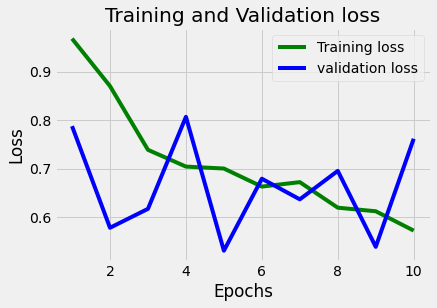

In [68]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

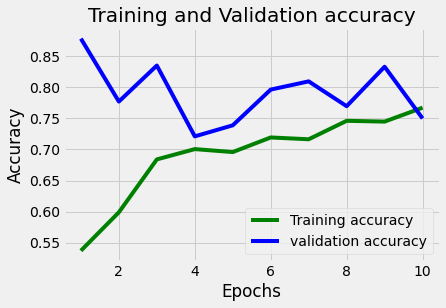

In [70]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()